Взять любой набор данных для бинарной классификации (можно скачать один из модельных с https://archive.ics.uci.edu/ml/datasets.php)

*Сделать feature engineering

Обучить любой классификатор (какой вам нравится)

Разделить ваш набор данных на два множества: P (positives) и U (unlabeled). Причем брать нужно не все положительные примеры (класс 1), а только лишь часть

Применить random negative sampling для построения классификатора в новых условиях

Сравнить качество с решением из пункта 3 (построить отчет - таблицу метрик)

*Поэкспериментировать с долей P на шаге 5 (как будет меняться качество модели при уменьшении/увеличении размера P)

https://archive.ics.uci.edu/ml/datasets/Steel+Industry+Energy+Consumption+Dataset

Data Set Information:

The information gathered is from the DAEWOO Steel Co. Ltd in Gwangyang, South Korea. It produces several types of coils, steel plates, and iron plates. The information on electricity consumption is held in a cloud-based system. The information on energy consumption of the industry is stored on the website of the Korea Electric Power Corporation (pccs.kepco.go.kr), and the perspectives on daily, monthly, and annual data are calculated and shown.


Attribute Information:

Data Variables Type Measurement

Industry Energy Consumption Continuous kWh

Lagging Current reactive power Continuous kVarh

Leading Current reactive power Continuous kVarh

tCO2(CO2) Continuous ppm

Lagging Current power factor Continuous %

Leading Current Power factor Continuous %

Number of Seconds from midnight Continuous S

Week status Categorical (Weekend (0) or a Weekday(1))

Day of week Categorical Sunday, Monday â€¦. Saturday

Load Type Categorical Light Load, Medium Load, Maximum Load

In [683]:
import pandas as pd
import numpy as np
colnames=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 
          'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'class']
df = pd.read_csv("adult.data", names=colnames, header=None)
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [684]:
import matplotlib
import matplotlib.pyplot as plt

In [685]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object

In [686]:
df['education'].value_counts().count()

16

In [687]:
df['education-num'].value_counts().count()

16

In [688]:
df = df.drop(columns='education')

In [689]:
df.head(3)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


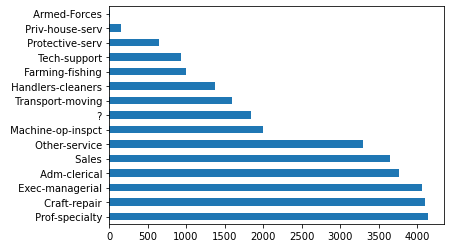

In [690]:
df['occupation'].value_counts().plot.barh();

{0: ' ?', 1: ' Adm-clerical', 2: ' Armed-Forces', 3: ' Craft-repair', 4: ' Exec-managerial', 5: ' Farming-fishing', 6: ' Handlers-cleaners', 7: ' Machine-op-inspct', 8: ' Other-service', 9: ' Priv-house-serv', 10: ' Prof-specialty', 11: ' Protective-serv', 12: ' Sales', 13: ' Tech-support', 14: ' Transport-moving'}


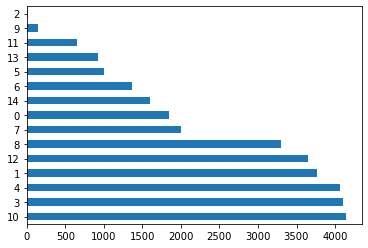

In [691]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()

mapped_education = pd.Series(label_encoder.fit_transform(df['occupation']))
mapped_education.value_counts().plot.barh()
print(dict(enumerate(label_encoder.classes_)))

In [692]:
df_col = df.drop(columns='class')

In [693]:
categorical_columns = df_col.columns[df_col.dtypes == 'object'].union(['occupation'])
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,7,77516,13,4,1,1,4,1,2174,0,40,39,<=50K
1,50,6,83311,13,2,4,0,4,1,0,0,13,39,<=50K
2,38,4,215646,9,0,6,1,4,1,0,0,40,39,<=50K
3,53,4,234721,7,2,6,0,2,1,0,0,40,39,<=50K
4,28,4,338409,13,2,10,5,2,0,0,0,40,5,<=50K


In [694]:
df.dtypes

age                int64
workclass          int32
fnlwgt             int64
education-num      int64
marital-status     int32
occupation         int32
relationship       int32
race               int32
sex                int32
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country     int32
class             object
dtype: object

In [695]:
df.describe()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.868892,1.897784e+05,10.080679,2.611836,6.572740,1.446362,3.665858,0.669205,1077.648844,87.303830,40.437456,36.718866
std,13.640433,1.455960,1.055500e+05,2.572720,1.506222,4.228857,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,7.823782
min,17.000000,0.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,4.000000,1.178270e+05,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000
50%,37.000000,4.000000,1.783560e+05,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000
75%,48.000000,4.000000,2.370510e+05,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000
max,90.000000,8.000000,1.484705e+06,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000


In [696]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [697]:
df_num_features = df.select_dtypes(include=['float64', 'int64'])

In [698]:
df_num_features.columns.tolist()

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [699]:
df['class'].value_counts()

 <=50K    24720
 >50K      7841
Name: class, dtype: int64

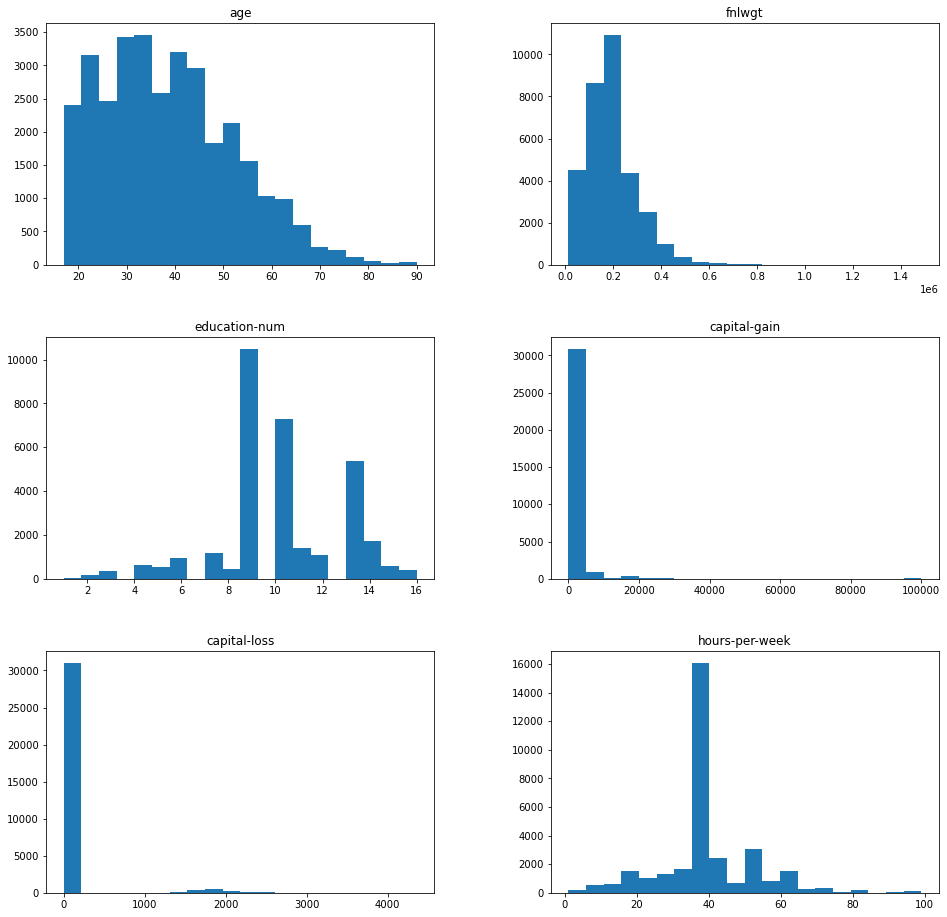

In [700]:
df_num_features.hist(figsize=(16, 16), bins=20, grid=False);

In [701]:
class DataPreprocessing:

    def __init__(self):
        self.medians = None
        self.fnlwgt_quantile = None
        self.capital_gain_quantile = None
        self.capital_loss_quantile = None
        
        
    def fit(self, X):     
        self.medians = X.median()
        self.fnlwgt_quantile = X['fnlwgt'].quantile(.975)
        self.capital_gain_quantile = X['capital-gain'].quantile(.975)
        self.capital_lossn_quantile = X['capital-loss'].quantile(.975)
        
    def transform(self, X):
        # Usage_kWh
        X['fnlwgt_outlier'] = 0
        X.loc[(X['fnlwgt'] > self.fnlwgt_quantile), 'fnlwgt_outlier'] = 1
        X.loc[X['fnlwgt'] > self.fnlwgt_quantile, 'fnlwgt'] = self.medians['fnlwgt']
        
        # CO2(tCO2)
        X['capital-gain_outlier'] = 0
        X.loc[(X['capital-gain'] > self.capital_gain_quantile), 'capital-gain_outlier'] = 1
        X.loc[X['capital-gain'] > self.capital_gain_quantile, 'capital-gain'] = self.medians['capital-gain']
        
        # CO2(tCO2)
        X['capital-loss_outlier'] = 0
        X.loc[(X['capital-loss'] > self.capital_loss_quantile), 'capital-loss_outlier'] = 1
        X.loc[X['capital-loss'] > self.capital_loss_quantile, 'capital-loss'] = self.medians['capital-loss']
        
        return X

In [702]:
df['class']

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: class, Length: 32561, dtype: object

{0: ' <=50K', 1: ' >50K'}


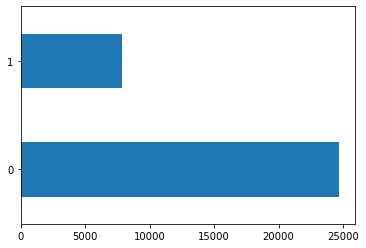

In [703]:
label_encoder = LabelEncoder()

mapped_education = pd.Series(label_encoder.fit_transform(df['class']))
mapped_education.value_counts().plot.barh()
print(dict(enumerate(label_encoder.classes_)))

In [704]:
df['class'] = label_encoder.fit_transform(df['class'])

In [705]:
df['class']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: class, Length: 32561, dtype: int32

In [706]:
preprocessor = DataPreprocessing()
preprocessor.fit(df)

In [707]:
df = preprocessor.transform(df)

In [708]:
df.dtypes

age                       int64
workclass                 int32
fnlwgt                  float64
education-num             int64
marital-status            int32
occupation                int32
relationship              int32
race                      int32
sex                       int32
capital-gain            float64
capital-loss            float64
hours-per-week            int64
native-country            int32
class                     int32
fnlwgt_outlier            int64
capital-gain_outlier      int64
capital-loss_outlier      int64
dtype: object

In [709]:
from sklearn.model_selection import train_test_split, cross_val_score

In [710]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('class', axis=1), 
                                                    df['class'])

In [711]:
from sklearn.tree import DecisionTreeRegressor, plot_tree, DecisionTreeClassifier

In [712]:
import xgboost as xgb

model = xgb.XGBClassifier()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

G:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:19:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [727]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, f1_score

def evaluate_results(y_test, y_predict):
    f1 = f1_score(y_test, y_predict)
    roc = roc_auc_score(y_test, y_predict)
    rec = recall_score(y_test, y_predict, average='binary')
    prc = precision_score(y_test, y_predict, average='binary')
    return f1, roc, rec, prc
    
evaluate_results(y_test, y_predict)

(0.7053941908713693,
 0.7974972417625203,
 0.6613070539419087,
 0.7557794902193242)

In [757]:
mod_data = df.copy()

# get the indices of the positives samples
pos_ind = np.where(mod_data['class'].values == 1)[0]

# shuffle them
np.random.shuffle(pos_ind)
# leave just 5% of the positives marked
perc = 0.05
pos_sample_len = int(np.ceil(perc * len(pos_ind)))

print(f'Using {pos_sample_len}/{len(pos_ind)} as positives and unlabeling the rest')
pos_sample = pos_ind[:pos_sample_len]

Using 393/7841 as positives and unlabeling the rest


In [758]:
mod_data['class_test'] = -1
mod_data.loc[pos_sample,'class_test'] = 1
print('target variable:\n', mod_data['class_test'].value_counts())

target variable:
 -1    32168
 1      393
Name: class_test, dtype: int64


In [759]:
mod_data.head(10)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,fnlwgt_outlier,capital-gain_outlier,capital-loss_outlier,class_test
0,39,7,77516.0,13,4,1,1,4,1,2174.0,0.0,40,39,0,0,0,0,-1
1,50,6,83311.0,13,2,4,0,4,1,0.0,0.0,13,39,0,0,0,0,-1
2,38,4,215646.0,9,0,6,1,4,1,0.0,0.0,40,39,0,0,0,0,-1
3,53,4,234721.0,7,2,6,0,2,1,0.0,0.0,40,39,0,0,0,0,-1
4,28,4,338409.0,13,2,10,5,2,0,0.0,0.0,40,5,0,0,0,0,-1
5,37,4,284582.0,14,2,4,5,4,0,0.0,0.0,40,39,0,0,0,0,-1
6,49,4,160187.0,5,3,8,1,2,0,0.0,0.0,16,23,0,0,0,0,-1
7,52,6,209642.0,9,2,4,0,4,1,0.0,0.0,45,39,1,0,0,0,-1
8,31,4,45781.0,14,4,10,1,4,0,0.0,0.0,50,39,1,0,1,0,-1
9,42,4,159449.0,13,2,4,0,4,1,5178.0,0.0,40,39,1,0,0,0,-1


In [760]:
mod_data = mod_data.sample(frac=1)


data_N = mod_data[mod_data['class_test'] == -1]
data_P = mod_data[mod_data['class_test'] == 1]

neg_sample = data_N[:data_P.shape[0]]
sample_test = data_N[data_P.shape[0]:]
pos_sample = data_P.copy()

print(neg_sample.shape, pos_sample.shape)
sample_train = pd.concat([neg_sample, pos_sample]).sample(frac=1)

(393, 18) (393, 18)


In [761]:
model_rns = xgb.XGBClassifier()
model.fit(sample_train.drop(['class', 'class_test'], axis=1).values,
          sample_train.loc[:, 'class'].values)
y_predict_rns = model.predict(sample_test.drop(['class', 'class_test'], axis=1).values)

evaluate_results(sample_test.loc[:, 'class'].values, y_predict_rns)

[10:36:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


G:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


(0.6313133861446087,
 0.7972901079922288,
 0.8481561822125814,
 0.5027726432532348)

In [762]:
evaluate_results(y_test, y_predict)

(0.7053941908713693,
 0.7974972417625203,
 0.6613070539419087,
 0.7557794902193242)

In [763]:
pd.DataFrame([
    evaluate_results(y_test, y_predict),
    evaluate_results(sample_test.loc[:, 'class'].values, y_predict_rns)
], columns={'f1', 'precision', 'recall', 'roc'}).round(2)

,roc,recall,precision,f1
0,0.71,0.8,0.66,0.76
1,0.63,0.8,0.85,0.50


In [764]:
mod_data_25 = df.copy()

# get the indices of the positives samples
pos_ind_25 = np.where(mod_data['class'].values == 1)[0]

# shuffle them
np.random.shuffle(pos_ind_25)
# leave just 25% of the positives marked
perc_25 = 0.25
pos_sample_len_25 = int(np.ceil(perc_25 * len(pos_ind_25)))

print(f'Using {pos_sample_len_25}/{len(pos_ind_25)} as positives and unlabeling the rest')
pos_sample_25 = pos_ind_25[:pos_sample_len_25]

Using 1961/7841 as positives and unlabeling the rest


In [765]:
mod_data_25['class_test'] = -1
mod_data_25.loc[pos_sample_25,'class_test'] = 1
print('target variable:\n', mod_data_25['class_test'].value_counts())

target variable:
 -1    30600
 1     1961
Name: class_test, dtype: int64


In [766]:
mod_data_25 = mod_data_25.sample(frac=1)


data_N_25 = mod_data_25[mod_data_25['class_test'] == -1]
data_P_25 = mod_data_25[mod_data_25['class_test'] == 1]

neg_sample_25 = data_N_25[:data_P_25.shape[0]]
sample_test_25 = data_N_25[data_P_25.shape[0]:]
pos_sample_25 = data_P_25.copy()

print(neg_sample_25.shape, pos_sample_25.shape)
sample_train_25 = pd.concat([neg_sample_25, pos_sample_25]).sample(frac=1)

(1961, 18) (1961, 18)


In [767]:
model_rns_25 = xgb.XGBClassifier()
model.fit(sample_train_25.drop(['class', 'class_test'], axis=1).values,
          sample_train_25.loc[:, 'class'].values)
y_predict_rns_25 = model.predict(sample_test_25.drop(['class', 'class_test'], axis=1).values)

evaluate_results(sample_test_25.loc[:, 'class'].values, y_predict_rns_25)

G:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:36:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(0.6705791505791506,
 0.7755246636419486,
 0.6299144059190483,
 0.7168565296351329)

In [768]:
pd.DataFrame([
    evaluate_results(y_test, y_predict),
    evaluate_results(sample_test.loc[:, 'class'].values, y_predict_rns),
    evaluate_results(sample_test_25.loc[:, 'class'].values, y_predict_rns_25)
], columns={'f1', 'precision', 'recall', 'roc'}).round(2)

,roc,recall,precision,f1
0,0.71,0.80,0.66,0.76
1,0.63,0.80,0.85,0.50
2,0.67,0.78,0.63,0.72
